In [1]:
# Import the necessary files in your notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset and read the first 10 rows of the dataset
df = pd.read_csv("WineQT.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [3]:
# Checking the column names present inside the dataset
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [4]:
# Understanding the structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
# Statistical summary of the dataset
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [6]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [7]:
# Checking for Null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [8]:
# Checking for duplicate values
df.duplicated().sum()

0

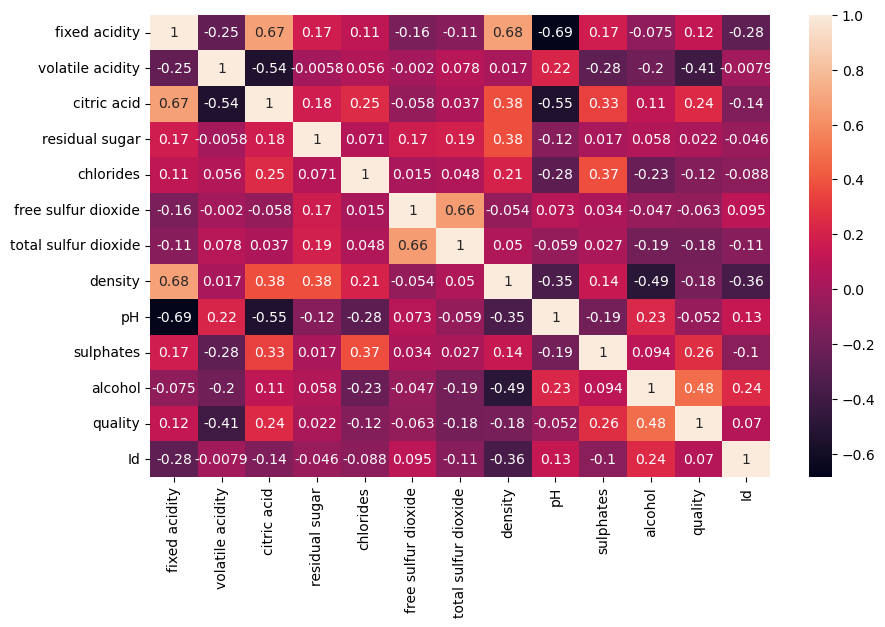

In [9]:
# Correlation matrix among all features inside the dataset
plt.figure(figsize = (10, 6))
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.savefig("Correlation Matrix.png")
plt.show()

In [10]:
# Detection of outliers using z-score
from scipy import stats
z_scores = np.abs(stats.zscore(df.drop(columns=['quality'])))

In [11]:
z_scores

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
0,0.521580,0.939332,1.365027,0.466421,0.231395,0.450467,0.363610,0.555854,1.270695,0.573658,0.963382,1.735618
1,0.292593,1.941813,1.365027,0.050060,0.234247,0.915920,0.643477,0.036165,0.708928,0.130881,0.593601,1.733462
2,0.292593,1.273492,1.161568,0.171289,0.107253,0.060071,0.246745,0.140103,0.325775,0.045254,0.593601,1.731306
3,1.653789,1.399789,1.483400,0.466421,0.252560,0.135127,0.429852,0.659792,0.964363,0.456235,0.593601,1.729150
4,0.521580,0.939332,1.365027,0.466421,0.231395,0.450467,0.363610,0.555854,1.270695,0.573658,0.963382,1.726993
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1.151292,0.118842,0.703785,0.171289,0.231395,1.306316,0.180503,0.514707,0.695966,0.541862,0.515741,1.696940
1139,0.865059,0.493785,0.958109,0.466421,0.400719,1.208717,0.241539,0.114545,0.695966,0.952843,0.870937,1.699096
1140,1.208538,0.382399,0.958109,0.392638,0.064922,1.599113,0.058432,0.951246,0.887542,0.456235,0.053515,1.701252
1141,1.380278,0.103932,0.856379,0.245072,0.527712,2.282306,0.155192,0.836914,1.334554,0.600574,0.700632,1.703408


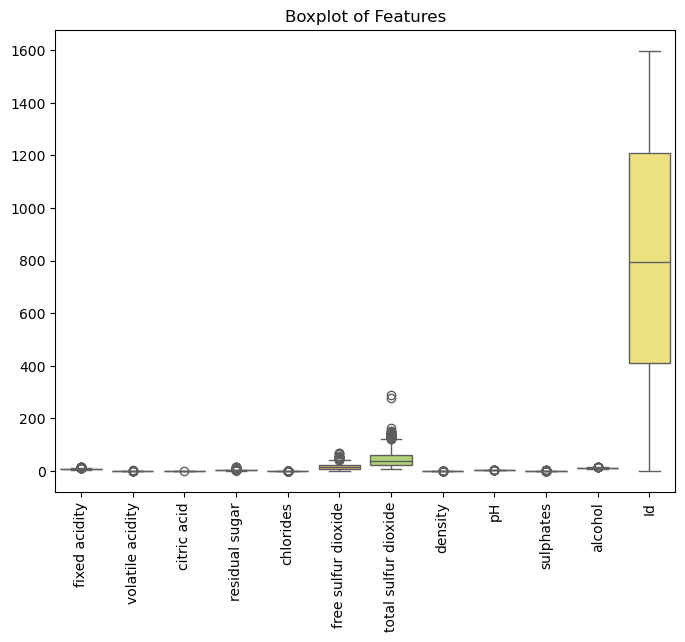

In [12]:
# Creating a boxplot to detect outliers
plt.figure(figsize = (8, 6))
sns.boxplot(data=df.drop(columns=['quality']), palette='Set3')
plt.title('Boxplot of Features')
plt.xticks(rotation=90)
plt.show()

In [13]:
# Remove those records whose value greater than 3 (Z > 3) outlier
threshold = 3
outliers = np.where(z_scores > threshold)
outliers_per_feature = (z_scores > threshold).sum(axis=0)
outliers_per_feature

fixed acidity            9
volatile acidity         5
citric acid              1
residual sugar          23
chlorides               21
free sulfur dioxide     13
total sulfur dioxide    10
density                 12
pH                       5
sulphates               21
alcohol                  7
Id                       0
dtype: int64

In [14]:
df.shape

(1143, 13)

In [15]:
# Dropping the irrelevant columns
df.drop(columns = ["Id"])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assign features (x) and target (y)
x = df.drop('quality', axis=1)
y = df['quality']

In [17]:
# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [18]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Make predictions on the test set
y_pred = rf_model.predict(x_test)
y_pred

array([5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 7, 7, 6, 6, 5, 5, 6, 5, 5, 7, 6, 6,
       5, 7, 5, 5, 6, 6, 5, 6, 6, 6, 7, 6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 5,
       5, 5, 5, 6, 5, 6, 7, 5, 5, 7, 6, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6,
       6, 5, 5, 5, 8, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5,
       6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 7,
       7, 5, 5, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5,
       7, 6, 6, 5, 5, 5, 6, 6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 7, 5, 6, 6, 6, 5, 6, 5, 6, 5, 5, 5,
       7, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6,
       7, 6, 6, 6, 5, 6, 7, 7, 5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 7, 6,
       6, 6, 5, 5, 5, 6, 6, 6, 6], dtype=int64)

In [20]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6812227074235808

In [21]:
from sklearn.svm import SVC

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Initialize the scaler and scale the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

# Check scaled data
print(pd.DataFrame(X_scaled, columns = x.columns).head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   
1      -0.292593          1.941813    -1.365027        0.050060   0.234247   
2      -0.292593          1.273492    -1.161568       -0.171289   0.107253   
3       1.653789         -1.399789     1.483400       -0.466421  -0.252560   
4      -0.521580          0.939332    -1.365027       -0.466421  -0.231395   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.450467             -0.363610  0.555854  1.270695  -0.573658   
1             0.915920              0.643477  0.036165 -0.708928   0.130881   
2            -0.060071              0.246745  0.140103 -0.325775  -0.045254   
3             0.135127              0.429852  0.659792 -0.964363  -0.456235   
4            -0.450467             -0.363610  0.555854  1.270695  -0.573658   

    alcohol        Id  
0 -0.963382 -1.735618  
1 -0.593

In [23]:
from imblearn.over_sampling import SMOTE

# Use SMOTE to oversample the minority class
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Check the new class distribution
print(y_resampled.value_counts())

quality
5    483
6    483
7    483
4    483
8    483
3    483
Name: count, dtype: int64


In [24]:
# Initialize and Train the SVC model on the training set
svc_model = SVC(kernel ='rbf', class_weight ='balanced')
svc_model.fit(x_train, y_train)

SVC(class_weight='balanced')

In [25]:
# Make predictions on the test set
y_pred = svc_model.predict(x_test)
y_pred

array([4, 3, 8, 7, 8, 7, 4, 4, 8, 8, 8, 3, 7, 7, 3, 7, 8, 7, 3, 7, 7, 7,
       4, 3, 8, 4, 7, 8, 8, 7, 7, 8, 8, 7, 8, 4, 8, 7, 7, 7, 7, 8, 4, 3,
       7, 4, 8, 8, 8, 3, 7, 8, 4, 8, 7, 8, 7, 3, 8, 7, 8, 7, 4, 3, 7, 4,
       8, 3, 4, 3, 8, 8, 3, 3, 8, 7, 3, 8, 3, 8, 4, 7, 4, 7, 3, 8, 3, 7,
       7, 8, 4, 7, 3, 7, 8, 8, 7, 8, 8, 4, 3, 7, 8, 7, 4, 8, 8, 8, 7, 8,
       8, 7, 8, 7, 7, 7, 8, 8, 7, 7, 3, 4, 4, 4, 7, 7, 7, 3, 3, 8, 3, 8,
       7, 8, 8, 3, 4, 4, 3, 3, 8, 8, 8, 7, 8, 4, 3, 4, 3, 7, 8, 8, 4, 8,
       3, 7, 4, 3, 7, 3, 8, 3, 7, 7, 8, 3, 7, 7, 8, 7, 7, 7, 7, 7, 4, 7,
       7, 8, 8, 3, 7, 4, 4, 3, 4, 4, 7, 3, 8, 7, 3, 8, 7, 4, 7, 7, 3, 7,
       7, 7, 3, 7, 8, 4, 7, 8, 4, 7, 3, 8, 4, 8, 7, 7, 8, 7, 8, 8, 8, 8,
       7, 3, 8, 7, 4, 8, 4, 8, 3], dtype=int64)

In [26]:
# Calculate the accuracy score
from sklearn.metrics import classification_report, accuracy_score

# Print the detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.05      0.33      0.09         6
           5       0.00      0.00      0.00        96
           6       0.00      0.00      0.00        99
           7       0.14      0.42      0.21        26
           8       0.01      0.50      0.03         2

    accuracy                           0.06       229
   macro avg       0.04      0.21      0.06       229
weighted avg       0.02      0.06      0.03       229



In [27]:
# Print the accuracy score of the SVC model
print("The Accuracy Score:", accuracy)

The Accuracy Score: 0.6812227074235808
